<a href="https://colab.research.google.com/github/aabhajalan/bcs_summer_project/blob/main/bcs_week1_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving mario.png to mario.png


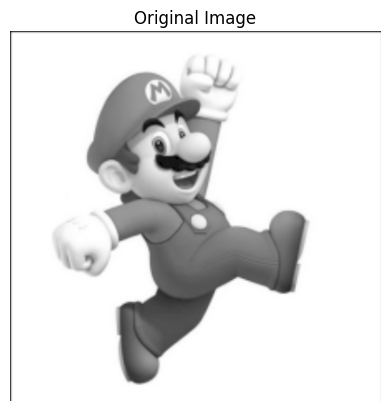

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread(r"mario.png",0)  #uploads image in grayscale
import os
if img is None:
    print("Error: Could not load image. Please check the file path.")
    exit()
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


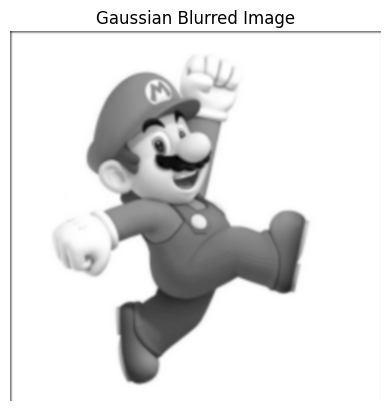

In [76]:
blurred = cv2.GaussianBlur(img, (3,3), 0.8)

plt.imshow(blurred, cmap='gray')
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.show()

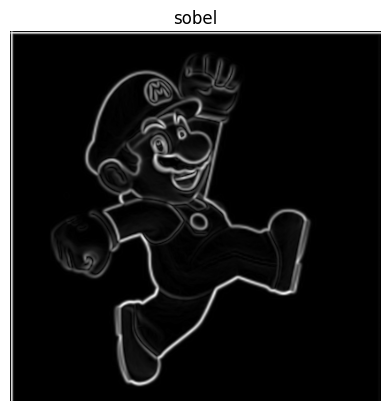

In [77]:
sobel_x=cv2.Sobel(blurred,cv2.CV_64F,1,0,ksize=3)
sobel_y=cv2.Sobel(blurred,cv2.CV_64F,0,1,ksize=3)
# scharr_x=cv2.Scharr(blurred,cv2.CV_64F,1,0)
# scharr_y=cv2.Scharr(blurred,cv2.CV_64F,0,1)
magnitude = np.hypot(sobel_x, sobel_y)
magnitude = (magnitude / magnitude.max()) * 255
magnitude = magnitude.astype(np.uint8)
#scharr=cv2.magnitude(scharr_x,scharr_y)
direction = np.arctan2(sobel_y, sobel_x) * (180 / np.pi)
direction = np.abs(direction)
plt.imshow(magnitude, cmap='grey')
plt.title('sobel')
plt.axis('off')
plt.show()
# print("Scharr")
# plt.imshow(scharr, cmap='grey')
# plt.axis('off')
# plt.show()

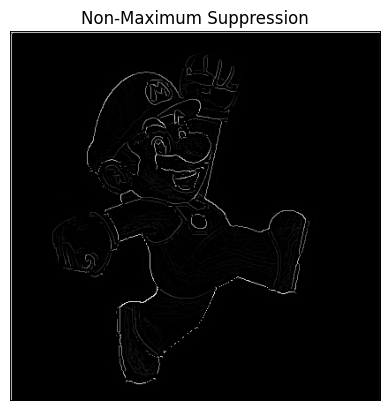

In [78]:
def non_maximum_suppression(magnitude, direction):
    M, N = magnitude.shape
    output = np.zeros((M, N), dtype=np.uint8)

    angle = direction % 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            try:
                q = 255
                r = 255

                # angle 0
                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q = magnitude[i, j+1]
                    r = magnitude[i, j-1]
                # angle 45
                elif (22.5 <= angle[i, j] < 67.5):
                    q = magnitude[i+1, j-1]
                    r = magnitude[i-1, j+1]
                # angle 90
                elif (67.5 <= angle[i, j] < 112.5):
                    q = magnitude[i+1, j]
                    r = magnitude[i-1, j]
                # angle 135
                elif (112.5 <= angle[i, j] < 157.5):
                    q = magnitude[i-1, j-1]
                    r = magnitude[i+1, j+1]

                if (magnitude[i, j] >= q) and (magnitude[i, j] >= r):
                    output[i, j] = magnitude[i, j]
                else:
                    output[i, j] = 0
            except IndexError as e:
                pass

    return output

nms = non_maximum_suppression(magnitude, direction)

plt.imshow(nms, cmap='gray')
plt.title('Non-Maximum Suppression')
plt.axis('off')
plt.show()


double thresholding

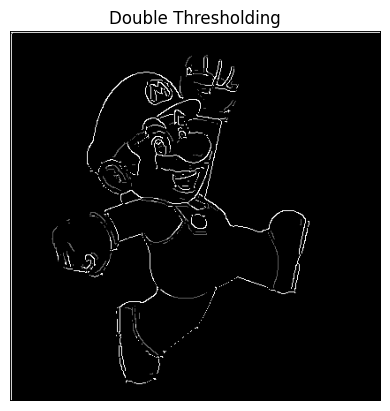

In [91]:
high_threshold = np.max(nms) * 0.2
low_threshold = high_threshold * 0.5

strong = 255
weak = 100
res = np.zeros_like(nms)

strong_i, strong_j = np.where(nms >= high_threshold)
zeros_i, zeros_j = np.where(nms < low_threshold)
weak_i, weak_j = np.where((nms >= low_threshold) & (nms < high_threshold))
res[strong_i, strong_j] = strong
res[weak_i, weak_j] = weak

plt.imshow(res, cmap='gray')
plt.title('Double Thresholding')
plt.axis('off')
plt.show()


hysteresis

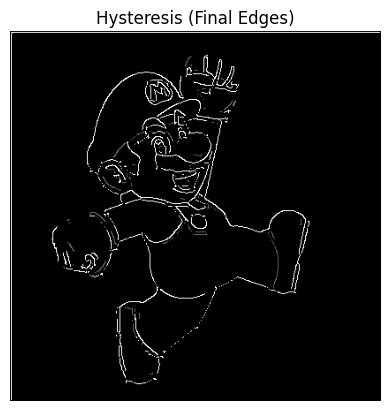

In [94]:
def hysteresis(img, weak=100, strong=255):
    M, N = img.shape
    changed=True
    while changed:
      changed=False
      for i in range(1, M-1):
          for j in range(1, N-1):
              if img[i, j] == weak:
                  if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                      or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                      or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                      img[i, j] = strong
                      changed=True
    img[img==weak]=100
    return img

final_edges = hysteresis(res.copy())
#print(np.unique(final_edges))
plt.imshow(final_edges, cmap='gray')
plt.title('Hysteresis (Final Edges)')
plt.axis('off')
plt.show()


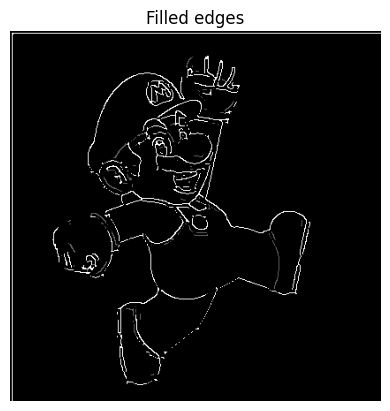

In [98]:
import cv2
import numpy as np

# 'edges' is your binary edge image (dtype=uint8, 0 or 255)
kernel = np.ones((2,2), np.uint8)  # Bigger kernel fills bigger gaps

closed = cv2.morphologyEx(final_edges, cv2.MORPH_CLOSE, kernel)

plt.imshow(closed, cmap='gray')
plt.title('Filled edges')
plt.axis('off')
plt.show()